# Homework 5

## Problem 1: Changing colors

Take a picture of something and put the file in the same folder as this notebook. This will be a lot more fun if the picture has multiple colors!

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

Write code below that reads your image file, saves it to a variable `img`, and plots it. You can copy paste code from the lecture.

my example:

![image1.png](image1.png)



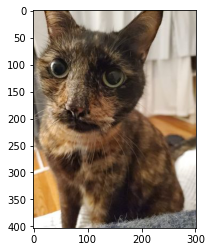

In [2]:
#your code here
img = mpimg.imread('puppycat.jpg')
fig, ax = plt.subplots(1, figsize=(8, 4))
ax.imshow(img)

How many pixels does your image have?
What are the minimum and maximum values of your image? What is the data type?

You should use https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html

In [3]:
# write and run code here that displays your answer
print("There are " + str(img.shape[0]) + " x " + str(img.shape[1]) + " pixels.")
print("The minimum value of the image is " + str(img.min()) + ".")
print("The maximum value of the image is " + str(img.max()) + ".")
print("The data type is " + str(img.dtype) + ".")

There are 403 x 302 pixels.
The minimum value of the image is 0.
The maximum value of the image is 255.
The data type is uint8.


Run the code below and concisely explain what it does in the comments.

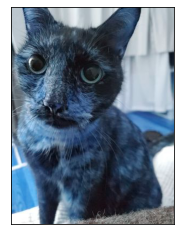

In [4]:
fig, ax = plt.subplots(1)

# remove the values on the axies
ax.set(xticks=[], yticks=[])

# The order of the RGB channels is reversed, so the RGB format is changed to BGR
ax.imshow(img[:,:,::-1])


Let's apply a sepia filter to your picture. You've probably seen this effect in movies and photo apps: https://helpx.adobe.com/photoshop/key-concepts/sepia-tone.html

The algorithm is actually very simple:
1. Let R, G, B be the RGB channels of the image.
2. Calculate:
```
newRed = 0.393*R + 0.769*G + 0.189*B
newGreen = 0.349*R + 0.686*G + 0.168*B
newBlue = 0.272*R + 0.534*G + 0.131*B
```
3. Clip newRed, newGreen, newBlue such that their values stay <= 255.
4. Turn values of newRed, newGreen, newBlue to integers.
5. Set newRed, newGreen, newBlue to be the new RGB channels of the image.

Links that might be helpful:
- https://numpy.org/doc/stable/reference/generated/numpy.minimum.html
- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html
- https://numpy.org/doc/stable/reference/generated/numpy.dstack.html

To get full credit:
- No for loops over the pixels.
- No modifying the original image.
- Add a short docstring.

![image2.png](image2.png)

In [5]:
def make_sepia(img):
    '''
    Create a filter by changing the values of the RGB channels
    Args:
        img: a 3D array.
    Returns:
        a new 3D array that contains the adjusted RGB channels
    '''
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    newRed = 0.393*R + 0.769*G + 0.189*B
    newGreen = 0.349*R + 0.686*G + 0.168*B
    newBlue = 0.272*R + 0.534*G + 0.131*B
    
    newRed[newRed[:,:] > 255] = 255
    newBlue[newBlue[:,:] > 255] = 255
    newGreen[newGreen[:,:] > 255] = 255
    
    newRed = newRed.astype(int)
    newGreen = newGreen.astype(int)
    newBlue = newBlue.astype(int)
    return np.dstack((newRed,newGreen,newBlue))

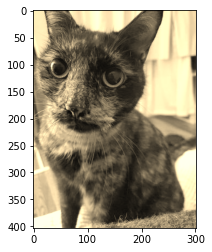

In [6]:
#call the function here to show the image
fig, ax = plt.subplots(1)
ax.imshow(make_sepia(img))

This time, turn your color image into black & white (grayscale). 
You need to:

1. Take the average of the R, G, B channels.
2. Turn them into integers.
3. Set that as the new RGB channels of the image.
4. Write a short docstring.

![image3.png](image3.png)

In [7]:
def make_grayscale(img):
    '''
    Turn the color image into black & white by making the RGB channels equal to their average
    Args:
        img: a 3D array.
    Returns:
        a new 3D array that contains the grayscale
    '''
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    avg = np.mean([R,G,B], axis = 0)
    avg = avg.astype(int)
    return np.dstack((avg,avg,avg))

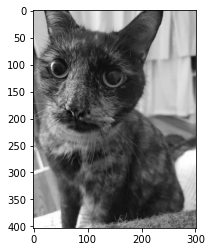

In [8]:
#call the function here to show the image
fig, ax = plt.subplots(1)
ax.imshow(make_grayscale(img))

(extra credit)

Now that you can make grayscale images, let's try making it look old. Many photos have salt and pepper noises, which are just randomly occurring black and white pixels: https://en.wikipedia.org/wiki/Salt-and-pepper_noise.

You need to:
1. Turn your image grayscale by calling your function from the previous part.
2. Based on the percent parameter `pct`, figure out how many pixels in your image will be modified. Set that number `n`.
3. Randomly select `0.5n` pixels and set those pixel values to be 0.
4. Randomly select `0.5n` pixels and set those pixel values to be 255.
5. Write a short docstring.

This might be useful: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

![image4.png](image4.png)

In [9]:
def salt_pepper_noise(img, pct):
    '''
    Add salt and pepper noises to the pictures
    Args:
        img: a 3D array.
        pct: a float.
    Returns:
        a new 3D array that contains the noises (the adjusted pixels)
    '''
    newimg = make_grayscale(img)
    i, j = img.shape[0], img.shape[1]
    n = pct * i * j
    rand1, rand2 = np.random.choice(i, int(0.5*n)), np.random.choice(j, int(0.5*n))
    newimg[rand1,rand2,:] = [0, 0, 0]
    rand3, rand4 = np.random.choice(i, int(0.5*n)), np.random.choice(j, int(0.5*n))
    newimg[rand3,rand4,:] = [255, 255, 255]
    return newimg

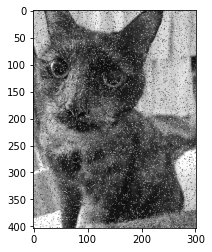

In [10]:
#call the function here to show the image
fig, ax = plt.subplots(1)
ax.imshow(salt_pepper_noise(img, 0.1))

Congratulations! You're basically Photoshop now!

## Problem 2: Scatterplot Matrices

Run the following code to download, import, and display a data set from the 2021 World Happiness Report. 

https://worldhappiness.report/ed/2021/

In [12]:
# if you experience ConnectionRefused errors, you may instead 
# copy the url into your browser and save the file manually

import pandas as pd

url = "https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls"
happiness = pd.read_excel(url)

# uncomment to see what the raw data looks like
# happiness

In [13]:
# only take some of the columns
happiness = happiness[happiness.columns[[0, 2, 13, 14, 15, 16, 17, 18]]]

# add overall rank
happiness.loc[:, "Overall rank"] = range(1, len(happiness)+1) 

# renaming columns
cols = [c.replace("Explained by: ", "") for c in happiness.columns]
cols[0] = "Country or region"
cols[1] = "Score"
cols[2] = "GDP per capita"
happiness = happiness.rename(columns= dict(zip(happiness.columns, cols)))

# switching column order
cols = ["Overall rank"] + cols[:-1]
happiness = happiness[cols]

# save changed table to csv file
happiness.to_csv('happiness_report_2021.csv', header=True)

In [14]:
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.8421,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524
1,2,Denmark,7.6195,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993
2,3,Switzerland,7.5715,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019
3,4,Iceland,7.5539,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940
4,5,Netherlands,7.4640,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531
...,...,...,...,...,...,...,...,...,...
144,145,Lesotho,3.5118,0.450848,0.730561,0.006992,0.405455,0.102819,0.015284
145,146,Botswana,3.4665,1.099198,0.724478,0.339868,0.538626,0.027394,0.088468
146,147,Rwanda,3.4147,0.363624,0.202183,0.406969,0.626681,0.227457,0.492669
147,148,Zimbabwe,3.1448,0.456724,0.648552,0.243230,0.358907,0.157088,0.075471


This is a `pandas` data frame. Observe the following: 

1. Each row corresponds to a country or region. 
2. The `Score` column is the overall happiness score of the country, evaluated via surveys. 
3. The other columns give indicators of different features of life in the country, including GDP, level of social support, life expectancy, freedom, generosity of compatriots, and perceptions of corruption in governmental institutions. 

 You can extract each of these columns using dictionary-like syntax: 
 
 ```python
 happiness["Score"]
 ```
 
 ```
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64
 ```
 
Technically, this output is a `pandas` `Series`; however, in this context (and most others) it's fine to simply think of it as a 1-dimensional `np.array()`. 

### Part A

As a warmup, create a scatterplot of the overall `Score` column against a numerical column of your choice. Give the horizontal and vertical axes appropriate labels. Discuss your result. Is there a correlation? Does that correlation make sense to you? 

[Text(0.5, 0, 'Social Support'), Text(0, 0.5, 'Score')]

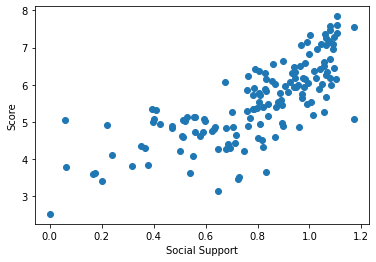

In [15]:
# plotting code here
fig, ax = plt.subplots(1)
y = happiness["Score"]
x = happiness["Social support"]
ax.scatter(x, y)
ax.set(xlabel = 'Social Support', ylabel = 'Score')

---

*From the graph, it seems that as the social support is greater, the score is also greater. However, we can also observe that the data points in the area of 0.8 - 1.1 social support and 5 - 6.5 scores are not displaying a clear correlation. From the whole picture, the correlation makes sense, but I guess that when the social support reaches a certain level, other variables are more important than the social support.*

---

## Part B

That plot you made may have helped you understand whether or not there's a relationship between the overall happiness score and the variable that you chose to plot. However, there are several variables in this data set, and we don't want to manually re-run the plot for each pair of variables. Let's see if we can get a more systematic view of the correlations in the data. 

Write a function called `scatterplot_matrix()`, with arguments `cols` and `figsize`. The `cols` argument should be a list of strings, each of which are the name of one of the columns above, for example `cols = ["Score", "GDP per capita", "Social support"]`. Your function should create a *scatterplot matrix*, like this:  

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="scatterplot_matrix.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other." width="400px">
</figure>

There is a separate scatterplot for each possible pair of variables. In fact, there are two: one where the first variable is on the horizontal axis, and one where it's on the vertical axis. Some analysts prefer to remove half the plots to avoid redundancy, but you don't have to bother with that. The diagonal is empty, since there's no point in investigating the relationship between a variable and itself. 

Don't forget comments and docstrings! 

In [16]:
# define your function
def scatterplot_matrix(cols, figsize):
    """
    Create a grid of scatterplots between each pair of the specified columns in the happiness
    data set. 
    cols: a list of column names in the  happiness data set. Only these columns will be plotted. 
    figsize: the desired dimensions of the figure. 
    """
    fig, ax = plt.subplots(len(cols), len(cols), figsize=figsize)
    rows = cols
    
    # go through the permutation of the elements
    for i, x in enumerate(rows): 
        for j, y in enumerate(cols):
            
            # if the x-axis doesn't equal to the y-axis, draw the scatter plots and label the correlation coefficient
            if x != y: 
                ax[i, j].scatter(happiness[x], happiness[y], s = 6)
                my_number = np.corrcoef(happiness[x], happiness[y])
                ax[i, j].set(xlabel = r"$\rho$ = " + str(np.round(my_number[0, 1], 2)))
            else: pass
            
            # lable and title the graph
            ax[i, j].set_ylabel(y, fontsize = 8)
            ax[i, j].set_title(x, fontsize = 8)
    
    # make sure the graph is in a good size
    fig.tight_layout(pad=2.0)

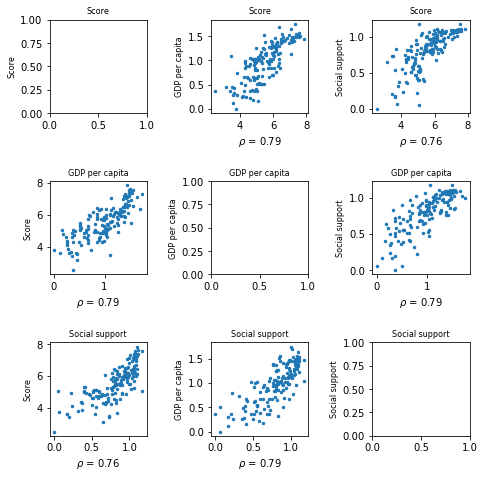

In [17]:
# test your code, several times if needed, and discuss the correlations you observe. 
# Add code cells if needed to show multiple outputs. 
cols = ["Score", 
        "GDP per capita", 
        "Social support"]

scatterplot_matrix(cols,figsize = (7,7))

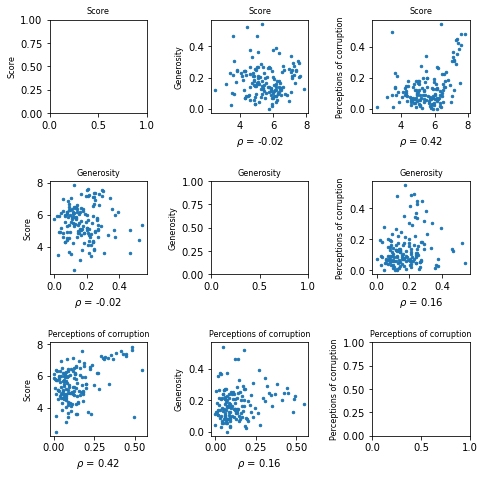

In [18]:
cols = ["Score", 
        "Generosity", 
        "Perceptions of corruption"]

scatterplot_matrix(cols,figsize = (7,7))

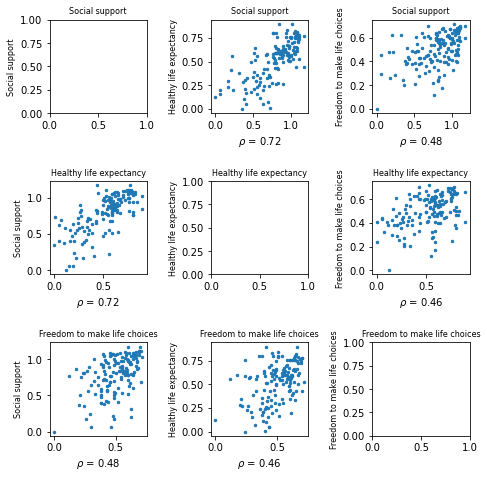

In [19]:
cols = ["Social support", 
        "Healthy life expectancy", 
        "Freedom to make life choices"]

scatterplot_matrix(cols,figsize = (7,7))

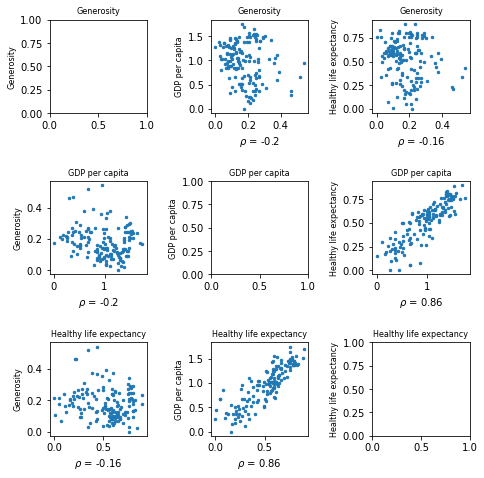

In [20]:
cols = ["Generosity", 
        "GDP per capita", 
        "Healthy life expectancy"]

scatterplot_matrix(cols,figsize = (7,7))

## Part C

The *correlation coefficient* is a measure of linear correlation between two variables. The correlation coefficient between $X$ and $Y$ is high if $X$ tends to be high when $Y$ is, and vice versa. Correlation coefficients lie in the interval $[-1, 1]$. 

`numpy` provides a function to conveniently compute the correlation coefficient between two or more variables. Find it, and then use it to add "captions" (as horizontal axis labels) to each panel of your plot giving the correlation coefficient between the plotted variables. For example, 

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="cor.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other. Correlation coefficients between 0.70 and 0.84 lie beneath each plot." width="400px">
</figure>

It's not required that you add the Greek letter $\rho$ (the classical symbol for correlation coefficients), but if you do want to, here's how. You can also tweak the rounding as desired.  

```python
ax.set(xlabel = r"$\rho$ = " + str(np.round(my_number, 2)))
```


Run your code on several different subsets of the columns. Discuss your findings. What positive correlations do you observe? Do they make sense? Are there any negative correlations? Do the quantitative results match what you see "by eye"? 

If you were going to create a model to attempt to predict overall happiness from other indicators, which columns would you use? Why? 

---

*The correlations of the first subset are all positive proportional, so we may say that the GDP per capita and the Social support positively affect the score. In other words, the greater the GDP and the Social support are, the higher the score is. The GDP and the Social support also seem to have a positive proportional relation.*

*All the plots of the second subset, including the score, generosity, and the perceptions of corruption, seem to be discrete. We may infer that there is not any relation among these three.*

*The third subset shows that lots of plots gather at the upper right area, which may indicate that any of the social support, the healthy life expectancy, and the freedom to make life choices has a high score when the other two are also in a good state.*

*The forth subset exhibits some information too. We can observe that the generosity doesn't have any correlation with the GDP and the healthy life expectancy, whereas there is a clear positive proportional relationship between the GDP and the healthy life expectancy.*


*Given by the graphs of the four subsets, I would choose "GDP per capita", "Social support", and "Healthy life expectancy", which are the three variables that display positive proportional relationships with the scores. The other three variables seem to not have a strong correlation with the happiness's score or other variables, so they are less useful than the previous ones when we train the model.*


---

## Problem 3: Plotting Time Series

Run the following code to download two time series data sets: 
- Historical data on the Dow Jones Industrial Average (a composite performance measure of the US stock market), retrieved from Yahoo Finance. 
- Cumulative COVID19 cases over time, from the [New York Times](https://github.com/nytimes/covid-19-data). 

In [21]:
# run this block
# if you experience ConnectionRefused errors, you may instead 
# copy the urls into your browser, save the files as DJI.csv 
# and COVID.csv respectively in the same directory as the notebook.
# Then, in the lines using the function pd.read_csv(), replace 
# the url with "DJI.csv" and "COVID.csv" 

import datetime

url = "https://query1.finance.yahoo.com/v7/finance/download/%5EDJI?period1=1580750232&period2=1712372632&interval=1d&events=history&includeAdjustedClose=true"
DJI = pd.read_csv(url)
DJI['date'] = pd.to_datetime(DJI['Date'])
DJI.drop(["Date"], axis = 1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
COVID = pd.read_csv(url)
COVID['date'] = pd.to_datetime(COVID['date'])

## Part A

The series `COVID['cases']` is essentially a `numpy` array containing the cumulative case counts over time. The COVID19 case data  is cumulative, but we would like to see the number of new cases per day (i.e. as in [this kind of plot](https://www.google.com/search?q=covid+stats)). Check the documentation for the `np.diff` function and figure out what it does. Use it appropriately to construct a new array, called `per_day`, giving the number of new cases per day. Then, make a new array called `per_day_date` that gives the appropriate date for each case count. In particular, you will need to ensure that `per_day` and `per_day_date` have the same shape. 

In [22]:
# your solution here
per_day = np.diff(COVID["cases"])
per_day = np.insert(per_day, 0, COVID["cases"][0])
per_day_date = COVID["date"]

In [23]:
per_day.shape == per_day_date.shape

True

## Part B

Create a figure with two very wide axes, one on top of the other (i.e. two rows, one column). Use the `sharex` argument of `plt.subplots()` to ensure that these two plots will share the same horizontal axis. 

Then: 

1. On the upper axis, plot the Dow Jones Industrial Average over time. For the horizontal axis use `DJI['date']`; the for the vertical use `DJI['Close']`. 
2. On the lower axis, plot the variables `per_day_date` and `per_day` to visualize the progress of the COVID19 pandemic over time. Use a different color for the time series. 

Give your plot horizontal and vertical axis labels. 

[Text(0.5, 1.0, 'The Trend of Stock Market during COVID-19 Pandemic Along With The Number of COVID-19 Cases')]

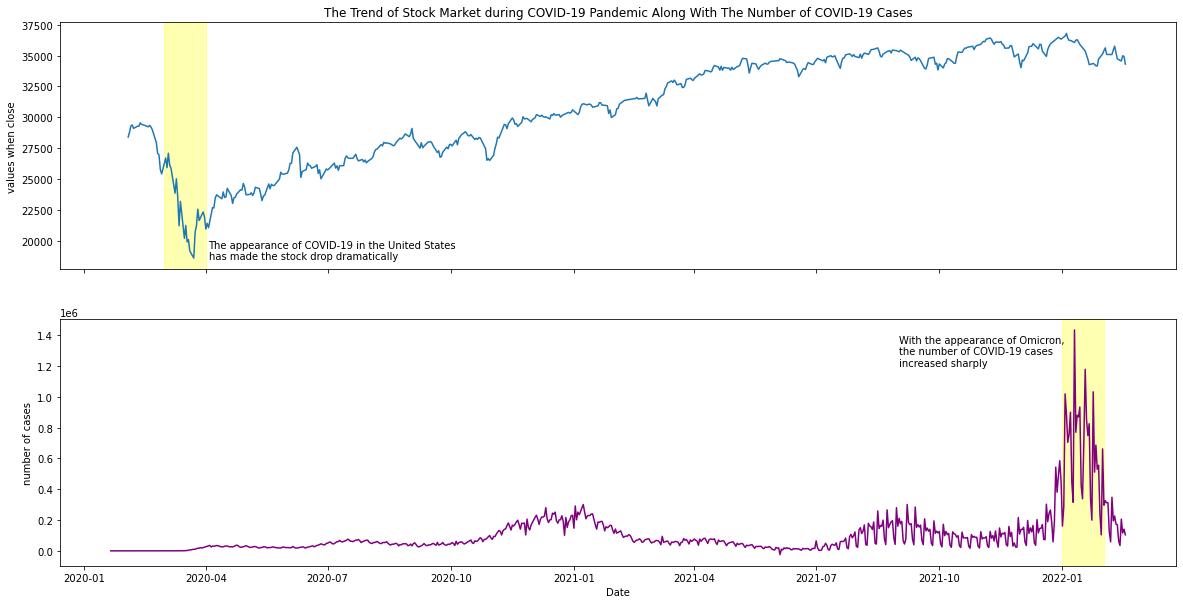

In [24]:
#your code here
fig, axr = plt.subplots(2,1,sharex = True,figsize=(20,10))
axr[0].plot(DJI["date"],DJI["Close"])
axr[0].set(ylabel = "values when close")
axr[1].plot(per_day_date,per_day,color = "purple")
axr[1].set(xlabel = "Date", ylabel = "number of cases")
axr[0].axvspan(datetime.datetime(2020,3,1),
              datetime.datetime(2020,4,1), 
              alpha = .3, 
              color = "yellow")
axr[1].axvspan(datetime.datetime(2022,1,1),
              datetime.datetime(2022,2,1), 
              alpha = .3, 
              color = "yellow")
axr[0].text(datetime.datetime(2020,4,3), 
           18500, 
           "The appearance of COVID-19 in the United States\nhas made the stock drop dramatically")
axr[1].text(datetime.datetime(2021,9,1), 
           1200000, 
           "With the appearance of Omicron,\nthe number of COVID-19 cases\nincreased sharply")
axr[0].set(title = "The Trend of Stock Market during COVID-19 Pandemic Along With The Number of COVID-19 Cases")

## Part C

The command 

```
ax[0].axvspan(datetime.datetime(2020,6,1),
              datetime.datetime(2020,6,30), 
              alpha = .3, 
              color = "gray")
```

will add a simple rectangular shade which can be used to highlight specific portions of a time-series. In the given code, this shade runs through the month of June 2020. Add at least two such rectangular shades to your figure corresponding to important time intervals. You can put two shades on one axis, or one on each. If you're not sure what time periods are important, just choose intervals at random. Feel free to modify the color and transparency as desired. You can modify your figure code from Part B -- no need for copy/paste. 

## Part D

The command 

```
ax[0].text(datetime.datetime(2020,9,15), 
           22000, 
           "penguins?\npenguins!")
```

will add a fun text annotation to your plot, with the first letter in horizontal position corresponding to September 15th, and at vertical position 22,000. Annotate each of your shaded regions with a few words describing their significance. Again, just modify your Part B code. 

## Part E

Add an overall title, spruce up your axis labels, and add anything else you think will make the plot look good. Again, you can just modify your Part B code, without copy/paste. 

Then, submit a job application at www.FiveThirtyEight.com and show Nate Silver your cool data visualization.  